<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/148_D3F_FORM7_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats


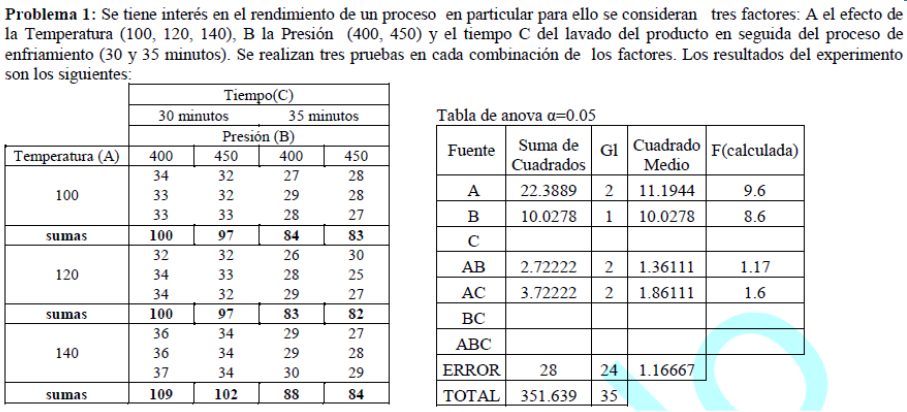

In [ ]:
# @title **Subiendo los datos**
import cv2 as cv
from google.colab import files
uploaded=files.upload()

Saving FORMS7.csv to FORMS7.csv


In [ ]:
# @title **1. Crear el DataFrame con los datos del diseño cuadrado grecolatino**

datos = pd.read_csv("FORMS7.csv", delimiter=';')



In [ ]:
# @title **2. Visualizando el DataFrame**
datos.head()


,Temperatura,Presion,Tiempo,Rendimiento
0,100,400,30,34
1,100,400,30,33
2,100,400,30,33
3,100,450,30,32
4,100,450,30,32


<Axes: xlabel='Temperatura', ylabel='Rendimiento'>

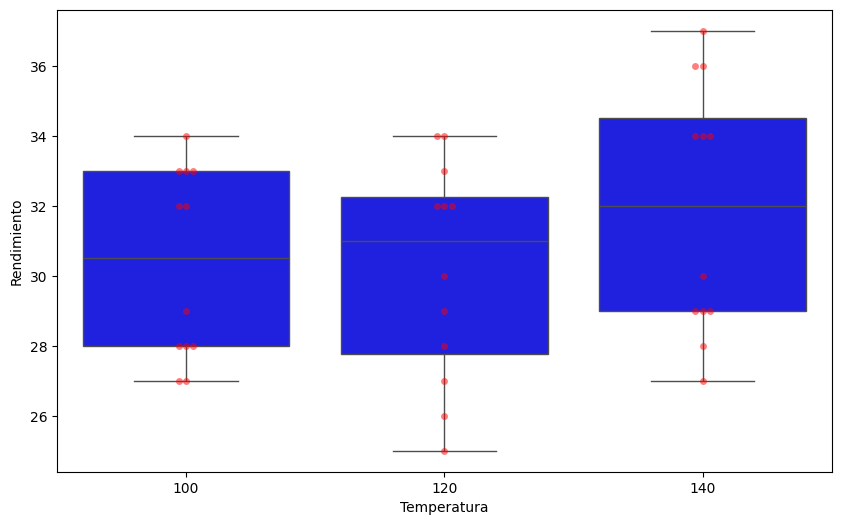

In [ ]:
# @title **3. Boxplot para Temperatura**
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

sns.boxplot(x="Temperatura", y="Rendimiento", data=datos, ax=axs, color='blue')
sns.swarmplot(x="Temperatura", y="Rendimiento", data=datos, color='red',
              alpha = 0.5, ax=axs)


<Axes: xlabel='Presion', ylabel='Rendimiento'>

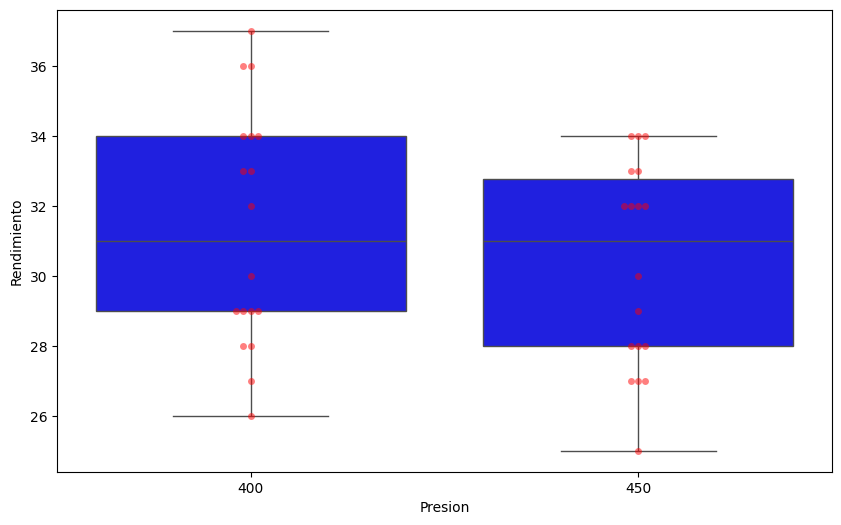

In [ ]:
# @title **4. Boxplot para Presion**
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

sns.boxplot(x="Presion", y="Rendimiento", data=datos, ax=axs, color='blue')
sns.swarmplot(x="Presion", y="Rendimiento", data=datos, color='red',
              alpha = 0.5, ax=axs)


<Axes: xlabel='Tiempo', ylabel='Rendimiento'>

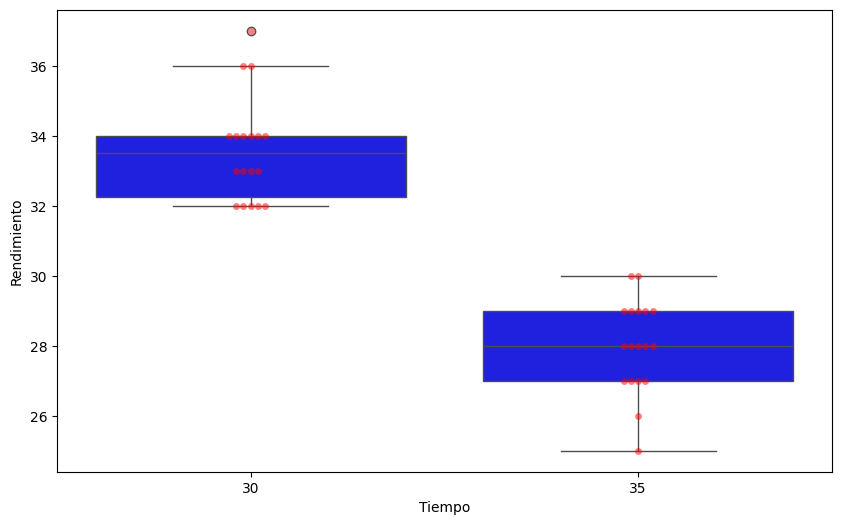

In [ ]:
# @title **5. Boxplot para Tiempo**
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

sns.boxplot(x="Tiempo", y="Rendimiento", data=datos, ax=axs, color='blue')
sns.swarmplot(x="Tiempo", y="Rendimiento", data=datos, color='red',
              alpha = 0.5, ax=axs)

<Axes: title={'center': 'Rendimiento vs Tiempo'}, xlabel='Tiempo', ylabel='Rendimiento'>

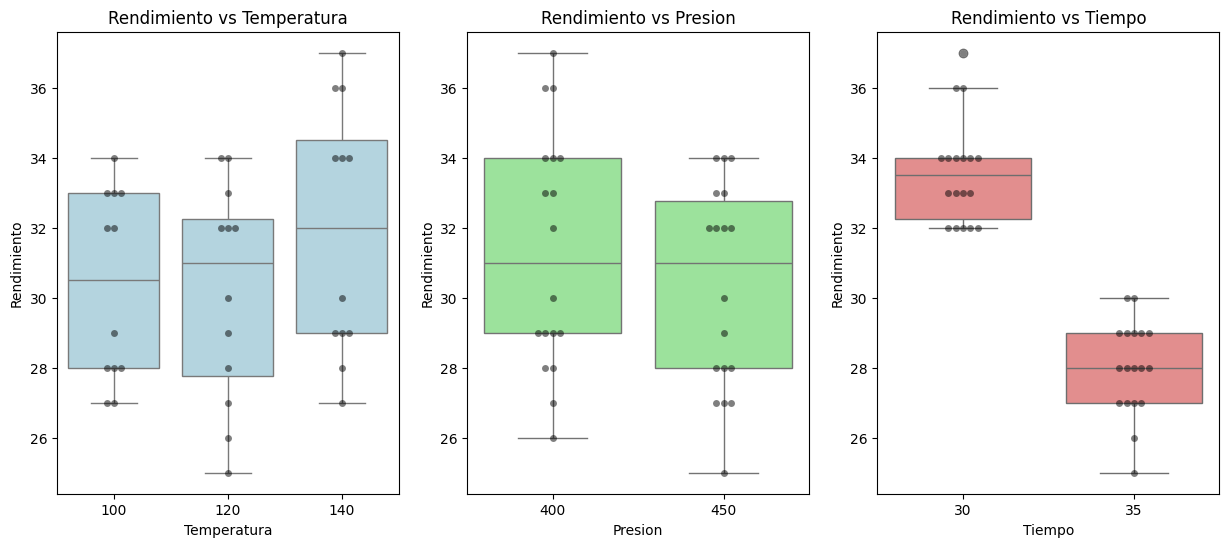

In [ ]:
# @title **6. BoxPlot para el datos - Mejorando colores**
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].set_title('Rendimiento vs Temperatura')
sns.boxplot(x="Temperatura", y="Rendimiento", data=datos, ax=axs[0], color='lightblue')  # Cambiar color de las cajas
sns.swarmplot(x="Temperatura", y="Rendimiento", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Rendimiento vs Presion')
sns.boxplot(x="Presion", y="Rendimiento", data=datos, ax=axs[1], color='lightgreen')  # Cambiar color de las cajas
sns.swarmplot(x="Presion", y="Rendimiento", data=datos, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Rendimiento vs Tiempo')
sns.boxplot(x="Tiempo", y="Rendimiento", data=datos, ax=axs[2], color='lightcoral')  # Cambiar color de las cajas
sns.swarmplot(x="Tiempo", y="Rendimiento", data=datos, color='black',
              alpha = 0.5, ax=axs[2])



In [ ]:
# @title **7. Análisis de Varianza Tipo I**
modeloD3F = ols("Rendimiento ~ C(Temperatura) * C(Presion) * C(Tiempo)", data = datos).fit()
anova_result2 = sm.stats.anova_lm(modeloD3F, typ=1)
print (anova_result2)

                                       df      sum_sq     mean_sq           F  \
C(Temperatura)                        2.0   22.388889   11.194444    9.595238   
C(Presion)                            1.0   10.027778   10.027778    8.595238   
C(Tiempo)                             1.0  283.361111  283.361111  242.880952   
C(Temperatura):C(Presion)             2.0    2.722222    1.361111    1.166667   
C(Temperatura):C(Tiempo)              2.0    3.722222    1.861111    1.595238   
C(Presion):C(Tiempo)                  1.0    1.361111    1.361111    1.166667   
C(Temperatura):C(Presion):C(Tiempo)   2.0    0.055556    0.027778    0.023810   
Residual                             24.0   28.000000    1.166667         NaN   

                                           PR(>F)  
C(Temperatura)                       8.667203e-04  
C(Presion)                           7.293760e-03  
C(Tiempo)                            4.708271e-14  
C(Temperatura):C(Presion)            3.284467e-01  
C(Temperat

In [ ]:
# @title **8. Análisis de Varianza Tipo I**
# Realizar el ANOVA
model = ols("Rendimiento ~ C(Temperatura) * C(Presion) * C(Tiempo)", data = datos).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Temperatura),2.0,22.388889,11.194444,9.595238,8.667203e-04
C(Presion),1.0,10.027778,10.027778,8.595238,7.293760e-03
C(Tiempo),1.0,283.361111,283.361111,242.880952,4.708271e-14
C(Temperatura):C(Presion),2.0,2.722222,1.361111,1.166667,3.284467e-01
C(Temperatura):C(Tiempo),2.0,3.722222,1.861111,1.595238,2.236316e-01
C(Presion):C(Tiempo),1.0,1.361111,1.361111,1.166667,2.908225e-01
C(Temperatura):C(Presion):C(Tiempo),2.0,0.055556,0.027778,0.023810,9.764947e-01
Residual,24.0,28.000000,1.166667,NaN,NaN


In [ ]:
mse_resid = model.mse_resid
print(mse_resid)

1.1666666666666667


In [ ]:
# @title **9. Resumen del Análisis de Varianza Tipo II**

print(modeloD3F.summary())

                            OLS Regression Results                            
Dep. Variable:            Rendimiento   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     25.22
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.57e-10
Time:                        22:07:27   Log-Likelihood:                -46.558
No. Observations:                  36   AIC:                             117.1
Df Residuals:                      24   BIC:                             136.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

# **prueba de rangos múltiples de Tukey** o **HSD (Honestly Significant Difference)**
+ La **prueba de rangos múltiples de Tukey** o **HSD (Honestly Significant Difference)** es un método para comparar medias en análisis de varianza (ANOVA) y se utiliza en diseños como el **cuadrado latino** para realizar comparaciones múltiples entre grupos. En este caso, es adecuada para comparar las medias de tratamientos tras realizar un ANOVA en un diseño de cuadrado latino.

+ La fórmula general para calcular la **diferencia honestamente significativa** (HSD) es la siguiente:

$$
HSD = q_{\alpha, k, \text{df}_E} \cdot \sqrt{\frac{MS_E}{n}}
$$

### Donde:
- $ q_{\alpha, k, \text{df}_E} $ es el **valor crítico de Tukey** obtenido de la **distribución de studentizada $ q $**. Este valor depende del nivel de significancia $ \alpha $, el número de grupos $ k $, y los grados de libertad del error $ \text{df}_E $ (generalmente obtenidos del análisis de varianza).
- $MS_E$ es el **cuadrado medio del error**, también obtenido del ANOVA.
- $ n $ es el número de observaciones en cada grupo (en el diseño de cuadrado latino, este valor generalmente será el mismo para todos los grupos).

### Paso a Paso:

1. **Realizar el ANOVA**: Primero se debe ejecutar el ANOVA para obtener $MS_E$ y los grados de libertad del error $ \text{df}_E $.
   
2. **Obtener el valor crítico de Tukey** $ q_{\alpha, k, \text{df}_E}$: Este valor se busca en tablas de la distribución de studentizada $q$ para el nivel de significancia deseado $\alpha$, el número de tratamientos $k$, y los grados de libertad del error.

3. **Calcular el valor HSD**: Usando la fórmula $HSD = q_{\alpha, k, \text{df}_E} \cdot \sqrt{\frac{MS_E}{n}}$, se calcula el valor de la diferencia mínima significativa.

4. **Comparar las diferencias entre las medias**: Si la diferencia entre dos medias es mayor que el valor de $ HSD$, entonces esas dos medias son significativamente diferentes entre sí.

### Ejemplo Rápido:

Supongamos que tenemos los siguientes valores tras realizar un ANOVA:
- $MS_E = 15.2$
- $n = 6$ (6 observaciones por grupo)
- $k = 4$ (4 tratamientos)
- $\text{df}_E = 12$ (grados de libertad del error)

Buscamos en una tabla de Tukey para $q_{\alpha=0.05, 4, 12}$ y obtenemos $ q = 4.20 $.

Entonces, el valor $HSD $ sería:

$$
HSD = 4.20 \cdot \sqrt{\frac{15.2}{6}} = 4.20 \cdot \sqrt{2.53} = 4.20 \cdot 1.59 = 6.678
$$

Cualquier diferencia entre las medias mayor a 6.678 será considerada significativa.

In [ ]:
#@title **10.Summary**
print(modeloD3F.summary())

                            OLS Regression Results                            
Dep. Variable:            Rendimiento   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     25.22
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.57e-10
Time:                        22:07:55   Log-Likelihood:                -46.558
No. Observations:                  36   AIC:                             117.1
Df Residuals:                      24   BIC:                             136.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
# @title **a. Calculando el HSD**$$HSD = q_{\alpha, k, \text{df}_E} \cdot \sqrt{\frac{MS_E}{n}}$$

import scipy.stats as stats

# Parámetros
alpha = 0.05
n = len(datos['Temperatura'].unique())  # Número de grupos
df_error = 8  # Grados de libertad del error (N-k)

# Calcular el valor crítico del rango studentizado
q_critical = stats.studentized_range.ppf(1 - alpha, n, df_error)
HSD = q_critical * np.sqrt(modeloD3F.mse_resid / n)

print(f'Terminos del HSD')
print(f'MSE = {modeloD3F.mse_resid:.2f}')
print(f"El rango studentizado para alpha = {alpha}, n = {n}, df_error = {df_error} es: q_critical = {q_critical:.2f}")
print(f'HSD teorico de la hipotesis principal es HSD = {HSD:.2f}')



Terminos del HSD
MSE = 1.17
El rango studentizado para alpha = 0.05, n = 3, df_error = 8 es: q_critical = 4.04
HSD teorico de la hipotesis principal es HSD = 2.52


In [ ]:
# @title **11. Descriptores numéricos para Temperatura**
print("Rendimiento ~ C(Temperatura) * C(Presion) * C(Tiempo)")
datos.groupby('Temperatura')['Rendimiento'].agg(['count','mean', 'std', 'median'])

Rendimiento ~ C(Temperatura) * C(Presion) * C(Tiempo)


,count,mean,std,median
Temperatura,,,,
100,12,30.333333,2.708013,30.5
120,12,30.166667,3.128559,31.0
140,12,31.916667,3.579191,32.0


In [ ]:
# @title **Descriptores numéricos con HSD**
datos2 = datos.groupby('Temperatura')['Rendimiento'].agg(['count','mean'])
datos2['HSD'] = HSD

datos2

,count,mean,HSD
Temperatura,,,
100,12,30.333333,2.520029
120,12,30.166667,2.520029
140,12,31.916667,2.520029


In [ ]:
# @title **Descriptores numéricos con HSD  con media ordenada**
datos2.sort_values('mean')

,count,mean,HSD
Temperatura,,,
120,12,30.166667,2.520029
100,12,30.333333,2.520029
140,12,31.916667,2.520029


group1,group2,meandiff,p-adj,lower,upper,reject
100,120,-0.1667,0.9908,-3.3309,2.9976,False
100,140,1.5833,0.4456,-1.5809,4.7476,False
120,140,1.75,0.3747,-1.4142,4.9142,False


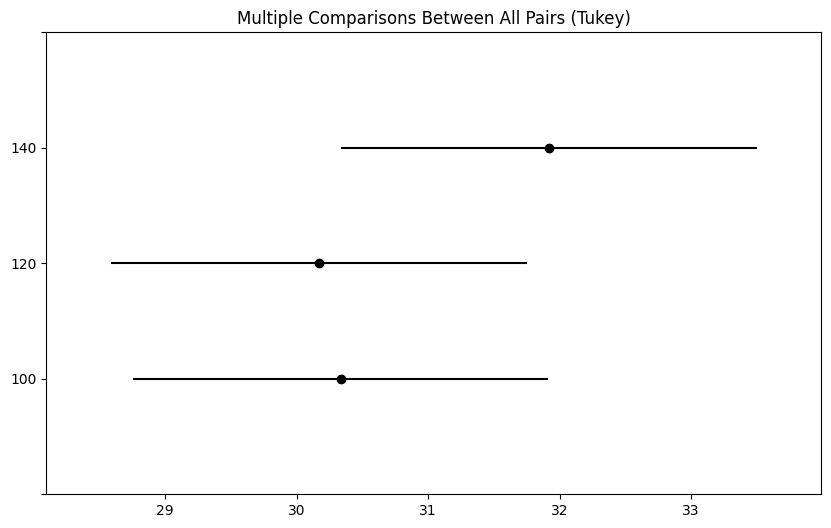

In [ ]:
# @title **HSD de Tukey Grafico para la diferencia de Medias Temperatura** "
tukey = pairwise_tukeyhsd(endog=datos["Rendimiento"],     # Data
                          groups=datos["Temperatura"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
400,450,-1.0556,0.3248,-3.2028,1.0917,False


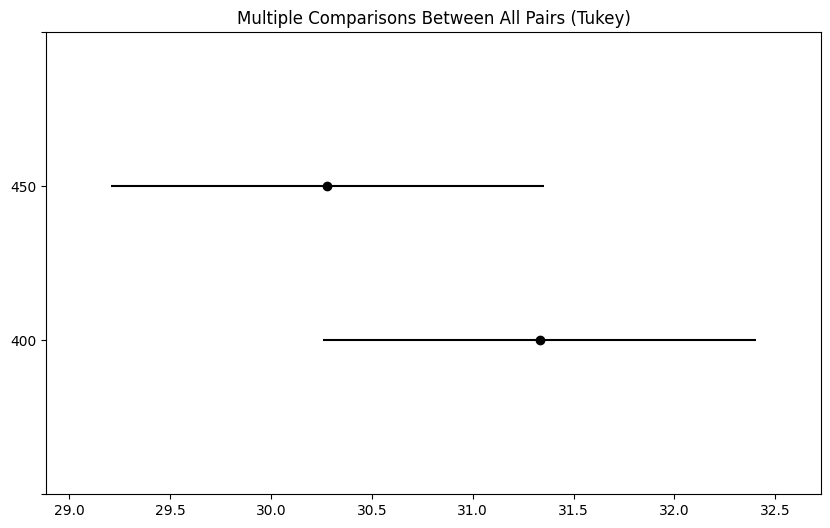

In [ ]:
# @title **12. HSD de Tukey Grafico Materia Presion** "
tukey = pairwise_tukeyhsd(endog=datos["Rendimiento"],     # Data
                          groups=datos["Presion"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()

In [ ]:
# @title **Descriptores numéricos con HSD para Presion**
datos3 = datos.groupby('Presion')['Rendimiento'].agg(['count','mean', 'std'])
datos3['HSD'] = HSD
datos3.sort_values('mean')

,count,mean,std,HSD
Presion,,,,
450,18,30.277778,2.926664,2.520029
400,18,31.333333,3.395499,2.520029


group1,group2,meandiff,p-adj,lower,upper,reject
400,450,-1.0556,0.3248,-3.2028,1.0917,False


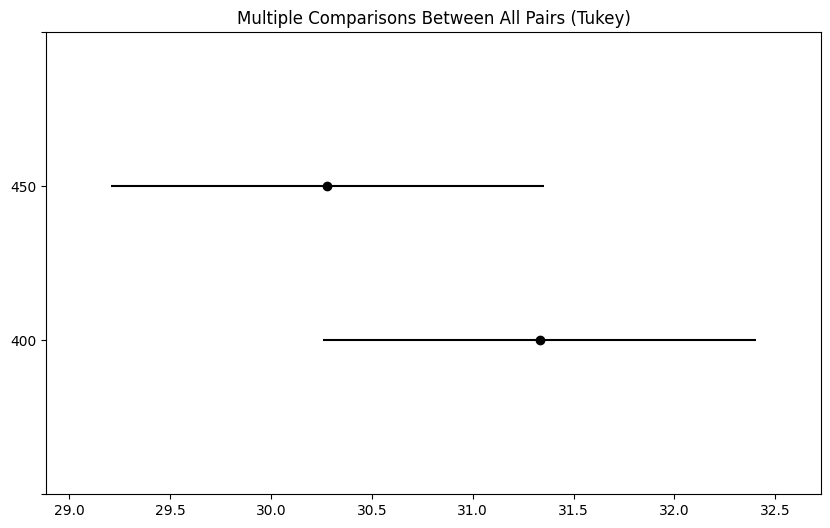

In [ ]:
# @title **HSD de Tukey Grafico Presion**
tukey = pairwise_tukeyhsd(endog=datos["Rendimiento"],     # Data
                          groups=datos["Presion"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
30,35,-5.6111,0.0,-6.5711,-4.6511,True


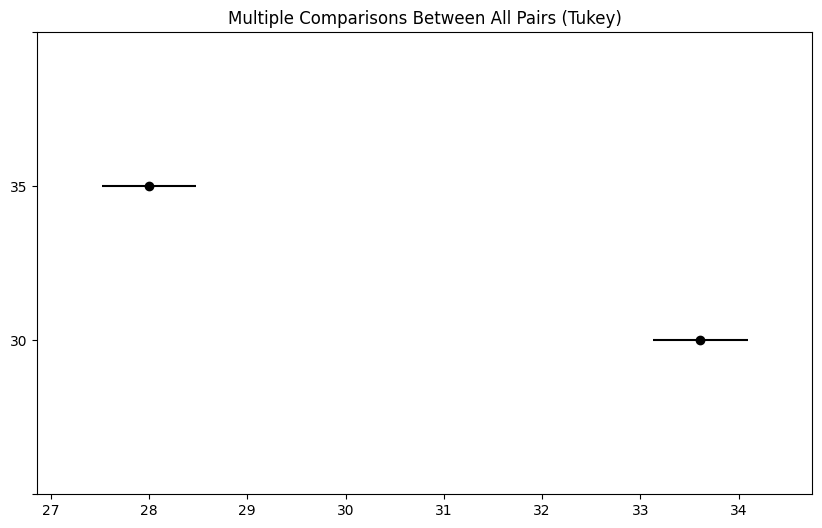

In [ ]:
# @title **13. HSD de Tukey Grafico Materia Presion** "
tukey = pairwise_tukeyhsd(endog=datos["Rendimiento"],     # Data
                          groups=datos["Tiempo"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()

In [ ]:
# @title **14. Comparaciones Múltiples:  FORMS - 05: LSD**
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Respuesta ~ Formulacion + Montaje + Lote + Operador
# Parámetros
alpha = 0.05
k = len(datos['Temperatura'].unique())  # Número de grupos (Formulacion)
N = len(datos)  # Número total de observaciones
df_error = modeloD3F.df_resid  # Grados de libertad del error (N-k)

# Obtener el valor crítico t para la prueba LSD
t_critical_LSD = stats.t.ppf(1 - alpha / 2, df_error)

# Obtener el MSE del modelo
mse = modeloD3F.mse_resid

# Calcular el tamaño de muestra promedio por grupo
n = datos.groupby('Temperatura')['Rendimiento'].count().mean()

# Calcular la LSD
LSD = t_critical_LSD * np.sqrt(2 * mse / n)

print(f'Términos de la LSD')
print(f'el valor de n = {n}')
print(f'MSE = {mse:.2f}')
print(f"El valor crítico t para alpha = {alpha/2}, df_error = {df_error} es: t_critical = {t_critical_LSD:.2f}")
print(f'LSD teórico para la hipótesis principal es LSD = {LSD:.2f}')


Términos de la LSD
el valor de n = 12.0
MSE = 1.17
El valor crítico t para alpha = 0.025, df_error = 24.0 es: t_critical = 2.06
LSD teórico para la hipótesis principal es LSD = 0.91


In [ ]:
# @title **15. Previo - Comparaciones Múltiples:  FORMS - 05: HSD y LSD**
datos4 = datos.groupby('Temperatura')['Rendimiento'].agg(['count','mean', 'std'])
datos4['HSD'] = HSD
datos4['LSD'] = LSD
datos4

,count,mean,std,HSD,LSD
Temperatura,,,,,
100,12,30.333333,2.708013,2.520029,0.910094
120,12,30.166667,3.128559,2.520029,0.910094
140,12,31.916667,3.579191,2.520029,0.910094


In [ ]:
# @title **16. Previo - Comparaciones Múltiples Ordenadas:  FORMS - 05: HSD y LSD**

datos4 = datos4.sort_values('mean')

# Display the sorted DataFrame.
print(datos4)

             count       mean       std       HSD       LSD
Temperatura                                                
120             12  30.166667  3.128559  2.520029  0.910094
100             12  30.333333  2.708013  2.520029  0.910094
140             12  31.916667  3.579191  2.520029  0.910094


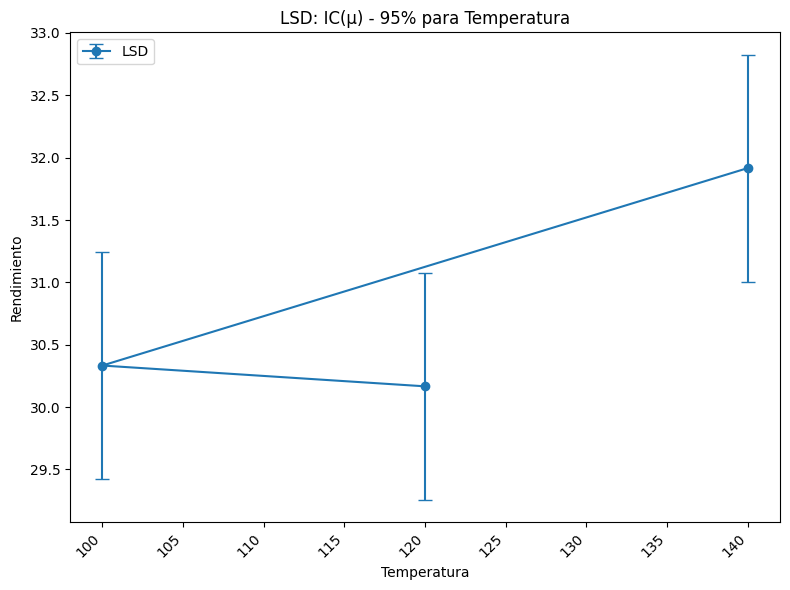

In [ ]:
# @title **17. Previo - Comparaciones Múltiples Ordenadas:   'LSD :IC(μ) - 95%'**
import matplotlib.pyplot as plt
import numpy as np

# Extract the mean and calculate LSD interval for each group
means = datos4['mean']
# Calculate the LSD interval based on the mean and LSD value
lower_bounds = means - LSD
upper_bounds = means + LSD

datos5 = datos4.sort_values('mean')
group_names = datos5.index

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(group_names, means, yerr=[means - lower_bounds, upper_bounds - means],
            fmt='o', capsize=5, linestyle='-', label='LSD')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Rendimiento')
ax.set_title('LSD: IC(μ) - 95% para Temperatura')
ax.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [ ]:
# @title **18. Las diferencias entre las medias entre las formulaciones - Caso 2 poblaciones**

# Create a new DataFrame to store the mean differences
mean_differences = pd.DataFrame(columns=['Temperatura 1', 'Temperatura 2', 'Mean Difference', 'Std Error', 't-statistic', 'p-value'])

# Get unique formulaciones
Temperaturas = datos['Temperatura'].unique()

# Calculate mean differences for all pairs of formulaciones
for i in range(len(Temperaturas)):
  for j in range(i + 1, len(Temperaturas)):
    form1 = Temperaturas[i]
    form2 = Temperaturas[j]

    mean1 = datos[datos['Temperatura'] == form1]['Rendimiento'].mean()
    mean2 = datos[datos['Temperatura'] == form2]['Rendimiento'].mean()

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(datos[datos['Temperatura'] == form1]['Rendimiento'],
                                          datos[datos['Temperatura'] == form2]['Rendimiento'])


    # Calculate standard error (approximation)
    n1 = len(datos[datos['Temperatura'] == form1])
    n2 = len(datos[datos['Temperatura'] == form2])
    std1 = datos[datos['Temperatura'] == form1]['Rendimiento'].std()
    std2 = datos[datos['Temperatura'] == form2]['Rendimiento'].std()
    std_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

    # Store the results in the DataFrame
    new_row = {'Temperatura 1': form1, 'Temperatura 2': form2, 'Mean Difference': round(mean1 - mean2, 2),
               'Std Error': round(std_error, 2), 't-statistic': round(t_statistic, 2), 'p-value': round(p_value, 3)}
    mean_differences = pd.concat([mean_differences, pd.DataFrame([new_row])], ignore_index=True)

# Display the DataFrame

mean_differences['HSD'] = HSD
mean_differences['LSD'] = LSD

print(mean_differences)


  Temperatura 1 Temperatura 2  Mean Difference  Std Error  t-statistic  \
0           100           120             0.17       1.19         0.14   
1           100           140            -1.58       1.30        -1.22   
2           120           140            -1.75       1.37        -1.28   

   p-value       HSD       LSD  
0    0.890  2.520029  0.910094  
1    0.235  2.520029  0.910094  
2    0.216  2.520029  0.910094  


<ipython-input-42-576a3e7685b2>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_differences = pd.concat([mean_differences, pd.DataFrame([new_row])], ignore_index=True)


In [ ]:
# @title **19. Las diferencias entre las medias entre las formulaciones - Caso 2 poblaciones**

# Create a new DataFrame to store the mean differences
mean_differences = pd.DataFrame(columns=['Temperatura 1', 'Temperatura 2', 'Mean Difference'])

# Get unique formulaciones
Temperaturas = datos['Temperatura'].unique()

# Calculate mean differences for all pairs of formulaciones
for i in range(len(Temperaturas)):
  for j in range(i + 1, len(Temperaturas)):
    form1 = Temperaturas[i]
    form2 = Temperaturas[j]

    mean1 = datos[datos['Temperatura'] == form1]['Rendimiento'].mean()
    mean2 = datos[datos['Temperatura'] == form2]['Rendimiento'].mean()

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(datos[datos['Temperatura'] == form1]['Rendimiento'],
                                          datos[datos['Temperatura'] == form2]['Rendimiento'])


    # Calculate standard error (approximation)
    n1 = len(datos[datos['Temperatura'] == form1])
    n2 = len(datos[datos['Temperatura'] == form2])
    std1 = datos[datos['Temperatura'] == form1]['Rendimiento'].std()
    std2 = datos[datos['Temperatura'] == form2]['Rendimiento'].std()
    std_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

    # Store the results in the DataFrame
    new_row = {'Temperatura 1': form1, 'Temperatura 2': form2, 'Mean Difference': round(mean1 - mean2, 2)}
    mean_differences = pd.concat([mean_differences, pd.DataFrame([new_row])], ignore_index=True)

# Display the DataFrame

mean_differences['HSD'] = HSD
mean_differences['LSD'] = LSD

print(mean_differences)


  Temperatura 1 Temperatura 2  Mean Difference       HSD       LSD
0           100           120             0.17  2.520029  0.910094
1           100           140            -1.58  2.520029  0.910094
2           120           140            -1.75  2.520029  0.910094


<ipython-input-45-618df30e64b2>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mean_differences = pd.concat([mean_differences, pd.DataFrame([new_row])], ignore_index=True)


## **20 Supuestos del Modelo**

In [ ]:
# @title  **a. Prueba analítica de Shapiro Wilks**
SW =stats.shapiro(modeloD3F.resid)
print(f'El estadistico de prueba para SW es {SW[0]:.2f}')
print(f'El p-valor para SW es {SW[1]*100:.2f}%')


El estadistico de prueba para SW es 0.94
El p-valor para SW es 6.17%


# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

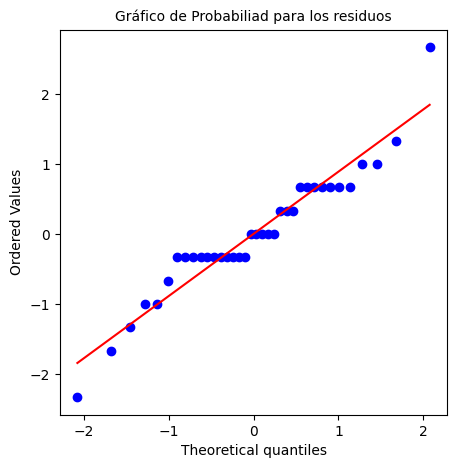

In [ ]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloD3F.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

In [ ]:
datos.head(12)

,Temperatura,Presion,Tiempo,Rendimiento
0,100,400,30,34
1,100,400,30,33
2,100,400,30,33
3,100,450,30,32
4,100,450,30,32
5,100,450,30,33
6,100,400,35,27
7,100,400,35,29
8,100,400,35,28
9,100,450,35,28


## **e. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [ ]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene Respuesta ~ Formulacion + Montaje + Lote + Operador
LEV_F = stats.levene(datos['Rendimiento'][datos['Temperatura'] == 100],
             datos['Rendimiento'][datos['Temperatura'] == 120],
             datos['Rendimiento'][datos['Temperatura'] == 140])
print(f'El estadistico de prueba para LEV_F es {LEV_F[0]:.2f}')
print(f'El p-valor para LEV_F es {LEV_F[1]*100:.2f}%')

El estadistico de prueba para LEV_M es 0.94
El p-valor para LEV_M es 46.15%


In [ ]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene Respuesta ~ Formulacion + Montaje + Lote + Operador
LEV_F = stats.levene(datos['Rendimiento'][datos['Presion'] == 400],
             datos['Rendimiento'][datos['Presion'] == 450])
print(f'El estadistico de prueba para LEV_F es {LEV_F[0]:.2f}')
print(f'El p-valor para LEV_F es {LEV_F[1]*100:.2f}%')

El estadistico de prueba para LEV_F es 0.68
El p-valor para LEV_F es 41.61%


In [ ]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene Respuesta ~ Formulacion + Montaje + Lote + Operador
LEV_F = stats.levene(datos['Rendimiento'][datos['Tiempo'] == 30],
             datos['Rendimiento'][datos['Tiempo'] == 35])
print(f'El estadistico de prueba para LEV_F es {LEV_F[0]:.2f}')
print(f'El p-valor para LEV_F es {LEV_F[1]*100:.2f}%')

El estadistico de prueba para LEV_F es 0.33
El p-valor para LEV_F es 57.12%


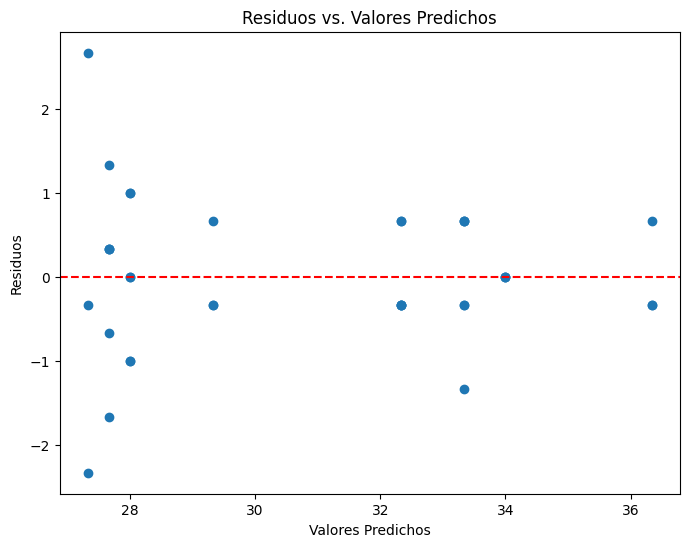

In [ ]:
# @title **21. Grafiquemos residuos vs predichos**

# Assuming you have your predicted values and residuals stored in variables like 'y_pred' and 'residuals'
plt.figure(figsize=(8, 6))
plt.scatter(modeloD3F.fittedvalues, modeloD3F.resid)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores Predichos")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

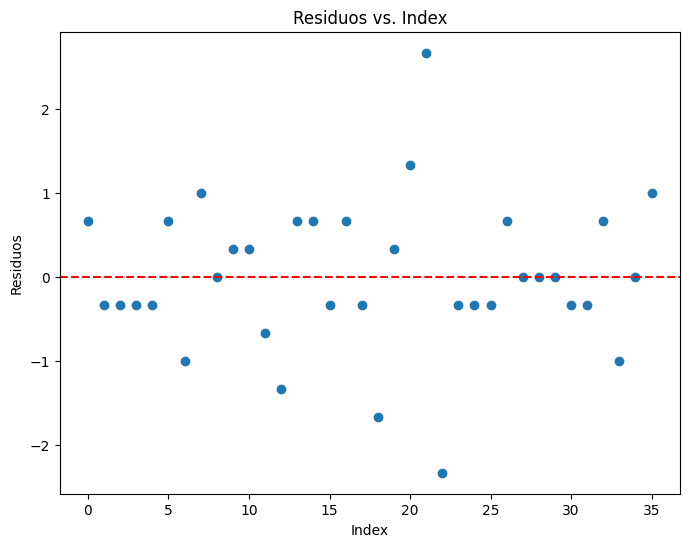

In [ ]:
# @title **22. Grafiquemos residuos vs index**
plt.figure(figsize=(8, 6))
plt.scatter(datos.index, modeloD3F.resid)
plt.xlabel("Index")
plt.ylabel("Residuos")
plt.title("Residuos vs. Index")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

In [ ]:
#@title **23. Descriptores numericos asociados**
print('f media y desviación típica para B')
datos.groupby(['Temperatura', 'Presion', 'Tiempo'])['Rendimiento'].agg(['mean', 'std'])

f media y desviación típica para B


mean       std
Temperatura Presion Tiempo                     
100         400     30      33.333333  0.577350
                    35      28.000000  1.000000
            450     30      32.333333  0.577350
                    35      27.666667  0.577350
120         400     30      33.333333  1.154701
                    35      27.666667  1.527525
            450     30      32.333333  0.577350
                    35      27.333333  2.516611
140         400     30      36.333333  0.577350
                    35      29.333333  0.577350
            450     30      34.000000  0.000000
                    35      28.000000  1.000000

In [ ]:
datos.columns

Index(['Temperatura', 'Presion', 'Tiempo', 'Rendimiento'], dtype='object')

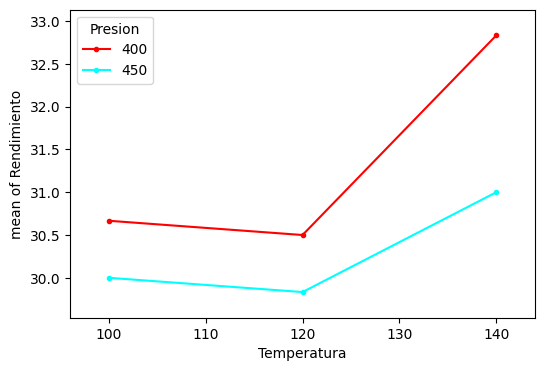

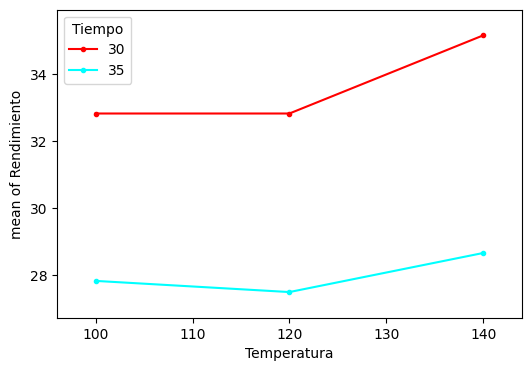

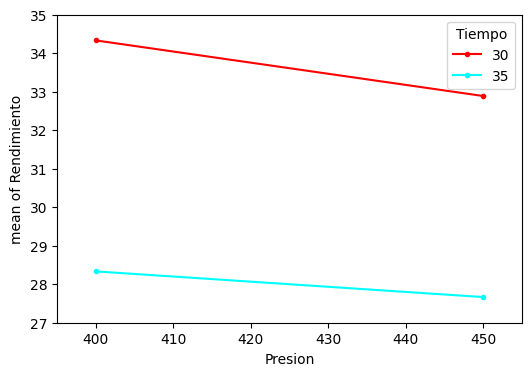

In [ ]:
#@title **24. Gráfico de Interacciones**
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Temperatura,
    trace    = datos.Presion,
    response = datos.Rendimiento,
    ax       = ax,
)
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Temperatura,
    trace    = datos.Tiempo,
    response = datos.Rendimiento,
    ax       = ax,
)
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Presion,
    trace    = datos.Tiempo,
    response = datos.Rendimiento,
    ax       = ax,
)